# Практическая работа №1: Исследование алгоритмов формирования аддитивных цепочек

Выполнил студент гр. 0304 Емельянов Дмитрий, вариант 33.

## Цель работы

Формирование представления о аддитивных цепочках, выработать умение составлять и применять алгоритмы для нахождения минимальных аддитивных цепочек для заданного числа, привить навык использования систем компьютерной математики для реализации алгоритмов.

## Основные теоретические положения

Пусть имеется задача вычисления $x^n$ за оптимальное кол-во операций. Для этого существует несколько алгоритмов. 

1) Бинарный метод (m-арный метод с базой m=2)
> 1.1) $n={d_0d_1d_2...d_t}$ в двочиной с.с  
1.2) выполняется построение x  
1.3) возведение $x^{d_0}$ в степень $2$ и умножение на $x^{d_1}$. Таким образом $y_1=x^{d_0*2+d_1}$   
1.4) $y_1$ в степень $2$ и умножаем на $x^{d_2}$. $y_2=x^{d_0*m^2+d_1*m+d_2}$  
1.5) повторяем: $y_{i+1}={y_i}^{2}*x^{d_i}$
1.6) когда все цифры будут обработаны $y_t=x^n$. Полученная последовательность $y_i$ позволяет последовательность вычислить $x^n$.  

Также, есть бинарный метод SX, в котором получается двоичная запись числа $n$, отбрасывается первая цифра, происходит замена 1 - 'SX', 0 - 'X', где S - возведение в квадрат, X - умножение на X. Далее, берётся базовая последовательность - X, и в порядке слева направо применяются данные операции. Как можно заметить, бинарный метод SX - частный случай метода m-арного с базой m=2.  

2) Метод множителей
> 2.1) Если $n$ составное, представляем $n=pq$, где $p$ - наименьший простой делитель, $n, q > 1$. Тогда можно вычислить $x^n=(x^{p})^{q}$. Если $n$ простое, можно вычислить $x^n=x^{n-1}*x$  
 2.2) Данные шаги повторяются для получающихся в разложении множителей, пока не останутся только операции возведения в 2  или умножения на уже вычисленные величины.  



**def** *Аддитивная цепочка - последовательность $a_i \in \mathbb{N}$ от $1$ до $n$,
$a_0=1$, $a_i=a_j + a_k$, $k\leq j < i$, последнее число $a_r=n$.*  
>Пример: $n=63$: $a_0=1, a_1=2, a_2=3,a_3=5,a_4=7,a_5=14,a_6=28,a_7=56,a_8=63$  

Обозначим $l(n) = r$ - наименьшая длина аддитивной цепочки для $n \in \mathbb{N}$.  
Тогда, можно обозначить связь между аддитивными цепочками и изученными методами быстрого возведения в степень:
> 1) Неравенство для бинарного метода SX: $l(n) \leq \lambda(n) + \nu(n)-1$, где $\lambda(n) = \lfloor log_2 x \rfloor$, $\nu(n)$ - вес Хэмминга для бинарной записи $n$ (кол-во ненулевых цифр).  
2) Для метода множителей: $l(mn)<=l(m) + l(n)$  
3) Для m-арного метода: $l(n) \leq m-2 + (k+1)t$, где $m=2^k$, $n=\sum_{j=0}^t d_j*m^{t-j}$. 

Свойства адд. цепочек:
> 1) Предполагаем, что цепочки строго возрастают
2) Если $a_i = a_j, i\neq j$, то одно из них можно удалить  
3) Шаг $i$ - пара $(j, k)$, где $0 \leq k \leq j < i$  
4) Если $\exists > 1$ пары $(j, k)$, полагаем, что $j$ - наиб. из всех возможных.

Виды шагов:
> 1) Удвоение, $j=k=i-1$  
2) Звёздный шаг, $j = i-1$  
3) Малый шаг, $\lambda(a_i)=\lambda(a_{i-1})$, то есть кол-во знаков числа в бин. записи не увеличилось после шага.

Свойства шагов:
> 1) шаг 1 - всегда удвоение  
2) удвоение - звёздный шаг, но не малый  
3) за удвоением всегда следует звёздный шаг  
4) Если $i$-ый шаг не малый, то $(i+1)$-ый шаг либо малый, либо звёздный, либо и тот, и другой  
5) Если $(i+1)$-ый шаг ни звёздный, ни малый, то $i$-ый шаг - малый.  

**Теорема:**  
>*Если аддитивная цепочка включает $d$ удвоений и $f=r-d$ неудвоений, то $n \leq 2^{d-1}*F_{f+3}$, где $F_i$ - $i$-ое число Фиббоначи* 

**Следствие:**  
> *Если аддитивная цепочка включает в себя f удвоений и s малых шагов, то $s \leq f \leq \frac{s}{1-lb(u)}$, где $u=\frac{\sqrt{5}+1}{2}$ - золотое сечение*

***Приближённые алгоритмы нахождения аддитивных цепочек:***  

**1) Алгоритм Брауэра**  
Дано число $n \in \mathbb{N}$, задано число $k \in \mathbb{N} \geq 2$. Тогда можно построить Брауэровскую цепочку.
> 1) Число $n$ представляется в $m=2^k$-ичной системе счисления, обозначим его $n_m$  
2) Создаётся базовая последовательность $1, 2, 3, ..., 2^k - 1$. Среди этих чисел будет $q_s$ - первая цифра $n_m$.   
3) Строится еще одна последовательность $2*q_s, 4*q_s, ..., 2^k*q_s, 2^k*q_s + r_s$, где $r_s$ - вторая цифра $n_m$. Число $2^k*q_s + r_s$ обозначим за $q_{s-1}$  
4) Аналогичные действия проводятся для $q_{s-1}$. Тогда можно описать очередной шаг алгоритма после выполнения шагов 1,2,3. Получаем новую последовательность $2*q_i, 4*q_i, ..., 2^k*q_i, 2^k*q_i + r_i$, где $r_i=(i+1)$-ая цифра $n_m$.  
5) Шаг 4 повторяется, пока в последовательности не появится $2^k*q_1 + r_1=n$. Цепочка будет состоять из полученных в шагах 2,3,4 последовательностей чисел.

**2) Алгоритм Яо**  
Дано число $n \in \mathbb{N}$, задано число $k \in \mathbb{N} \geq 2$.
> 1) Число $n$ представляется в $m=2^k$-ичной системе счисления, $n=\sum_{i=0}^{j} a_j*2^{ik}, a_j \neq 0$    
2) Введём функцию $d: d(z) = \sum_{i:a_i=z} 2^{ik}$  
3) Строится базовая последовательность $1, 2, 4, 8, ..., 2^{\lambda(n)}$.  
4) Вычисляются значения $d(z)$  $\forall z \in \{1, 2, 3, ... , 2^k -1\}$ и $d(z) \neq 0 $  
5) Вычисляются значения $z*d(z)$  $\forall z$  
6) В конечном итоге $n = \sum_{z=1}^{2^k -1} zd(z)$

**def** *Звездная цепочка (ЗЦ) - аддитивная цепочка, которая содержит только звёздные шаги*
> 1) Длина звездной цепочки $l^* (n) \leq l(n)$  
2) Шаг звездной цепочки $a_i = a_{i-1} + a_k$ $\forall k < i$  

**def** Пусть задана звёздная цепочка длины $m-1$ вида $a_1=1,a_2,...,a_m$. *Для любой ЗЦ существует вектор индексов $r=\{r_1, r_2, ..., r_{m-1}\}$ длины $m-1$ такой, что $r_i = \{z: 1 \leq z \leq i \}$ и $a_i = a_{i-1} + a_{r_{i-1}}$, для $2 \leq i \leq m - 1$.*

Сравнимость двух векторов индексов
> Пусть даны векторы одинакового размера $r = \{r_1, r_2, ... ,r_m\}$, $\tilde r = \{\tilde r_1, \tilde r_2, ... ,\tilde r_m\}$.  
Тогда, $r \succ \tilde r$, если $r_1=\tilde r_1, r_2=\tilde r_2, ..., r_{i-1} = \tilde r_{i-1}, r_i > \tilde r_i$  
Для перехода от старшего вектора индексов к ближайшему меньшему необходимо найти самую старшую позицию, содержащую число $>1$ и уменьшить её на 1, не меняя предшествующий позиции, а последующие позиции ставятся в своё максимальное значение.


## Постановка задачи

Реализовать точные и приближённые алгоритмы нахождения минимальных аддитивных цепочек с использованием системы компьютерной математики SageMath, провести анализ алгоритмов. Полученные результаты содержательно проинтерпретировать.

## Выполнение работы


### 0) Реализация некоторых вспомогательных функций

In [97]:
# вспомогательная функция для перевода числа из 10чной системы счисления 
# в систему счисления с основанием base
def base10_to_other(n, base):
    new_base_n = []
    while n:
        new_base_n.append(n % base)
        n //= base
    return new_base_n[::-1]

# кол-во цифр в бинарной записи n, уменьшенная на 1
def _lambda(n):
    return n.nbits()-1

# вес Хэмминга - кол-во 1 в бинарной записи n
def _vu(n):
    return n.popcount()

### 1) Вручную (т.е. не реализовывая алгоритм на Sage) построить последовательность вычислений для $𝑥^n$ бинарным методом и методом множителей для 2-3 значений 𝑛 (значение 𝑛 > 30 выбираются студентом самостоятельно). Сравнить количество операций для каждого метода, сделать выводы.

Построим последовательность вычислений для $x^n$ бинарным методом и методом множителей для разных значений n.  

##### 1.1) Возьмём простое значение n = 37.  
***Бинарный метод:***  
Получаем запись числа n в 2-чном виде: $n=100101_2$. База: x. Выполняем дальнейшие шаги алгоритма:  
> Используем 2ую цифру n: $(x^1)^2*x^0 = x^2$    
Используем 3ью цифру n: $(x^2)^2*x^0 = x^4$   
Используем 4ую цифру n: $(x^4)^2*x^1 = x^9$   
Используем 5ую цифру n: $(x^9)^2*x^0 = x^{18}$   
Используем 6ую цифру n: $(x^{18})^2*x^1 = x^{37}$

Итого вычисление x^37 можно представить как $(((((x^2)^2)^2)*x)^2)^2*x$, выполнив 5 операций возведения в квадрат и 2 операции умножения на х.  

***Метод множителей:***  
Представляем число $n=pq$, где p - наим простой делитель n, $n, q>1$. Тогда можно вычислить $x^n=(x^p)^q$. Если n - простое, вычисляем $x^n=x^{n-1}x$. На этом основываются шаги алгоритма. Проведём их:
> $n=37$ - простое: $x^{37}=x^{36}*x$  
$n_1=36=2*{18}$ - н.п. делитель 2: $x^{36}=(x^2)^{18}$, положим $y=x^2$  
$n_2=18=2*9$ - н.п. делитель 2: $y^{18}=(y^2)^9$, положим $z=y^2$  
$n_3=9=3*3$ - н.п. делитель 3: $z^9=(z^3)^3$, положим $w=z^3=z^2*z$  
$n_4=3$ - простое: $w^3=w^2*w$  

Итого, x^37 можно вычислить за 4 операции возвезедния в квадрат и 3 операции умножения.

##### 1.2) Возьмём составное значение n = 42.  
***Бинарный метод:***  
Получаем запись числа n в 2-чном виде: $n=101010_2$. База: x. Выполняем дальнейшие шаги алгоритма:  
> Используем 2ую цифру n: $(x^1)^2*x^0 = x^2$    
Используем 3ью цифру n: $(x^2)^2*x^1 = x^5$   
Используем 4ую цифру n: $(x^5)^2*x^0 = x^{10}$   
Используем 5ую цифру n: $(x^{10})^2*x^1 = x^{21}$   
Используем 6ую цифру n: $(x^{21})^2*x^0 = x^{42}$

Итого вычисление $x^{42}$ можно представить как $((((((x^2)^2)*x)^2)^2*x)^2)^2$, выполнив 6 операций возведения в квадрат и 2 операции умножения на х.  

***Метод множителей:***  
Представляем число $n=pq$, где p - наим простой делитель n, $n, q>1$. Тогда можно вычислить $x^n=(x^p)^q$. Если n - простое, вычисляем $x^n=x^{n-1}x$. На этом основываются шаги алгоритма. Проведём их:
> $n=42=2*21$ - н.п. делитель 2: $x^{42}=(x^2)^{21}$  
$n_1=21=3*7$ - н.п. делитель 3: $x^{21}=(x^3)^{7}$, положим $y=x^3=x^2*x$  
$n_2=7$ - простое: $y^{7}=y^6*y$ 
$n_3=6=2*3$ - н.п. делитель 2: $y^6=(y^2)^3$, положим $z=y^2$  
$n_4=3$ - простое: $z^3=z^2*z$  

Итого, x^42 можно вычислить за 4 операции возвезедния в квадрат и 3 операции умножения.

#### 1.3) Возьмём значение n = 63.  
***Бинарный метод:***  
Получаем запись числа n в 2-чном виде: $n=111111_2$. База: x. Выполняем дальнейшие шаги алгоритма:  
> Используем 2ую цифру n: $(x^1)^2*x^1 = x^3$    
Используем 3ью цифру n: $(x^3)^2*x^1 = x^7$   
Используем 4ую цифру n: $(x^7)^2*x^1 = x^{15}$   
Используем 5ую цифру n: $(x^{15})^2*x^1 = x^{31}$   
Используем 6ую цифру n: $(x^{31})^2*x^1 = x^{63}$

Итого вычисление $x^{63}$ можно представить как $((((x^2*x)^2*x)^2*x)^2*x)^2*x$, выполнив 5 операций возведения в квадрат и 5 операций умножения на х.  

***Метод множителей:***  
Представляем число $n=pq$, где p - наим простой делитель n, $n, q>1$. Тогда можно вычислить $x^n=(x^p)^q$. Если n - простое, вычисляем $x^n=x^{n-1}x$. На этом основываются шаги алгоритма. Проведём их:
> $n=63=3*21$ - н.п. делитель 3: $x^{63}=(x^3)^{21}$, положим $c=x^3=x^2*x$  
$n_1=21=3*7$ - н.п. делитель 3: $c^{21}=(c^3)^{7}$, положим $y=c^3=c^2*c$  
$n_2=7$ - простое: $y^{7}=y^6*y$ 
$n_3=6=2*3$ - н.п. делитель 2: $y^6=(y^2)^3$, положим $z=y^2$  
$n_4=3$ - простое: $z^3=z^2*z$  

Итого, x^63 можно вычислить за 4 операции возвезедния в квадрат и 4 операции умножения.

#### 1.4) Анализ  
Для простого числа $n=37$ метод множителей (далее - м.м.) дал меньшее количество операций возведения в квадрат, но большее количество операций умножения, хотя суммарно операций в обоих методах вышло 7.  

Для составного числа $n=42$ м.м., аналогично, дал меньшее количество операций возведения в квадрат, но большее кол-во умножений, однако теперь в м.м. суммарно вышло 7 операций, когда в бинаром методе (далее - б.м.) вышло 8.  

Для числа вида $2^k-1$ $n=63$ м.м. дал более оптимальный результат - 4 операции каждого типа против 5 операций каждого типа в б.м.  

Из полученных результатов можно сделать вывод, что метод множителей в целом эффективние бинарного метода. Связано это с тем, что м.м. использует уже вычисленные на прошлых шагах числа в качестве множителей (например, $z^3=z^2*z$, где $z=f(f(x))$), в то время как б.м. позволяет умножения только на сам х. Однако, в методе множителей используется дополнительное действие - нахождение наименьшего простого делителя числа, что, на некоторых числах, может быть трудозатратным. Также, промежуточные результаты нужно где-то хранить - используется дополнительная память.  

Чем больше "1" встречатся в бинарной записи числа, тем большее кол-во операций требует бинарный метод исходя из оценки $\lambda(n)+\nu(n)-1$. Лучше всего он работает для степеней двоек - $2^k$, и хуже всего для чисел вида $2^k-1$, так как такие числа в бинарной записи полностью состоят из единиц.

Таким образом, метод множителей эффективнее бинарного метода, однако он требует дополнительной памяти и дополнительного действия - поиск наименьшего простого делителя, поэтому, иногда бинарный метод оказывается предпочтительнее.

### 2) Реализовать алгоритм Брауэра (для нечётных вариантов) и алгоритм Яо (для чётных вариантов) для вычисления приближённых аддитивных цепочек для различных чисел при варьировании параметра 𝑘, сопоставить длины полученных аддитивных цепочек с минимальной аддитивной цепочкой для заданного числа. Сделать выводы

Реализуем алгоритм Брауэра:

In [193]:
# красивый вывод содержательной информации об ответе и представлении n
def pretty_print_brauer_full(n, k, brauer_ans):
    n_new_base = base10_to_other(n, 2**k)
    print(f"Число n: {n}")
    print(f"Число n в {2**k}-ной с.с.: {'-'.join(str(elem) for elem in n_new_base)}")
    pretty_print_brauer_ans(brauer_ans)

# вывод длины цепочки и самой цепочки
def pretty_print_brauer_ans(brauer_ans):
    chain_length, chain = brauer_ans
    print(f"Длина адд. цеп: {chain_length}")
    print("Адд. цеп.: ", end='')
    if chain_length < 50:
        print(chain)
    else:
        # если цепочка слишком длинная - выведем начало и конец
        print(f"{chain[:20]}, ... ,{chain[-20:]}")
    
def brauer_alg(n, k):  
    # инициализация базы
    n_base = 2**k
    n_new_base = base10_to_other(n, n_base)
    
    max_need_number = max((i for i in n_new_base))
    B = [i for i in range(1, max_need_number + 1)]
    # первый шаг: q_s
    q_s = n_new_base.pop(0)
    B.extend((2**i * q_s for i in range(1, k+1) if 2**i * q_s not in B))
   
    # далее: q_i + r_i
    q_i = B[-1]
    n_found = False
    while not n_found and n_new_base:
        r_i = n_new_base.pop(0)
        q_i += r_i
        if r_i != 0:
            B.append(q_i)
        if q_i == n:
            n_found
            break
            
        B.extend(2**i * q_i for i in range(1, k+1))
       
        q_i = B[-1]
    
    # возвращаем представление числа в 2**k с.с., длину АЦ, саму АЦ
    return len(B)-1, B

In [209]:
# пример ответа алгоритма
n, k= 67889, 2
ans = brauer_alg(n, k)
pretty_print_brauer_full(n, k, ans)

Число n: 67889
Число n в 4-ной с.с.: 1-0-0-2-1-0-3-0-1
Длина адд. цеп: 21
Адд. цеп.: [1, 2, 3, 4, 8, 16, 32, 64, 66, 132, 264, 265, 530, 1060, 2120, 4240, 4243, 8486, 16972, 33944, 67888, 67889]


Теперь исследуем влияние параметра k на ответ:

Влияние параметра k на длину аддитивной цепочки для n = 37894389


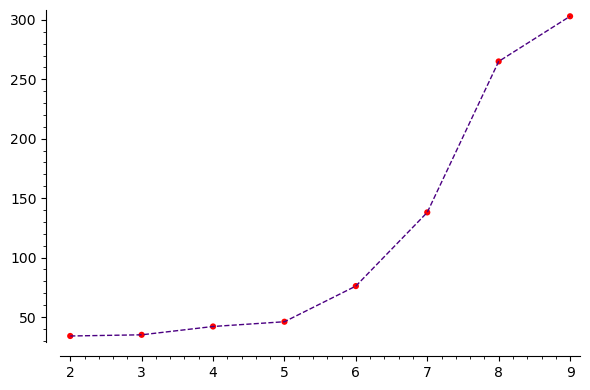

Те же значения, но рассматриваем от 2 до 5


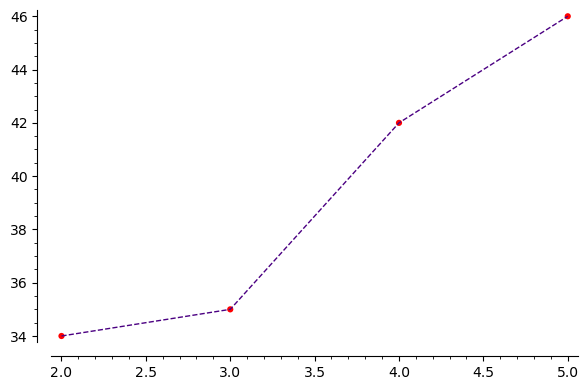

Влияние параметра k на длину аддитивной цепочки для n = 47839948409834683717134578679


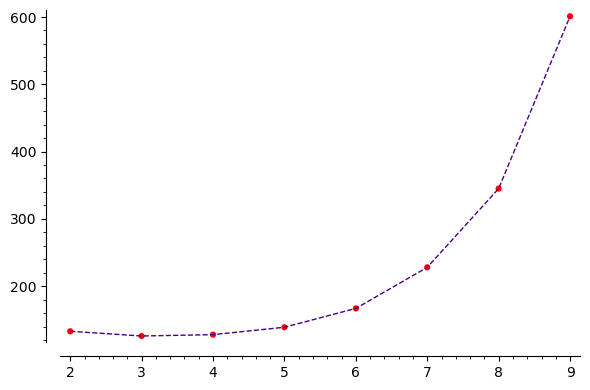

Те же значения, но рассматриваем от 2 до 5


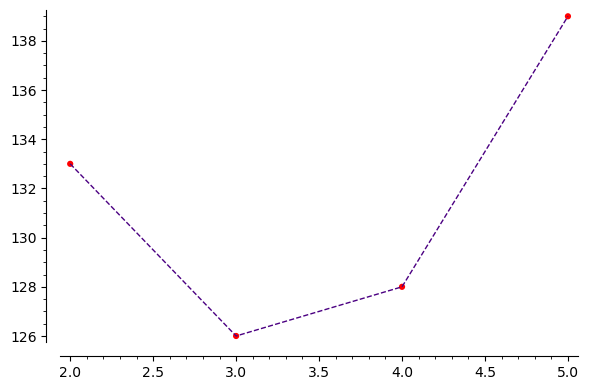

Влияние параметра k на длину аддитивной цепочки для n = 3840239819027432814678129435532539734242319083214579879680809


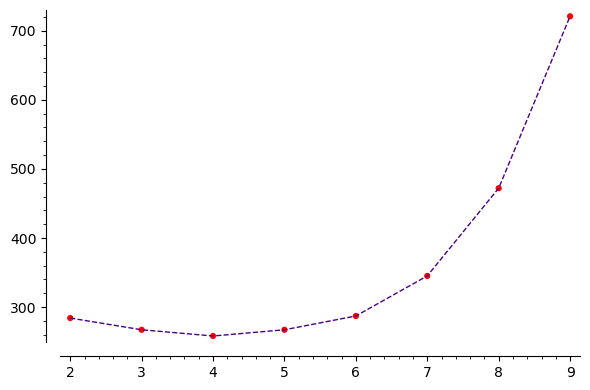

Те же значения, но рассматриваем от 2 до 5


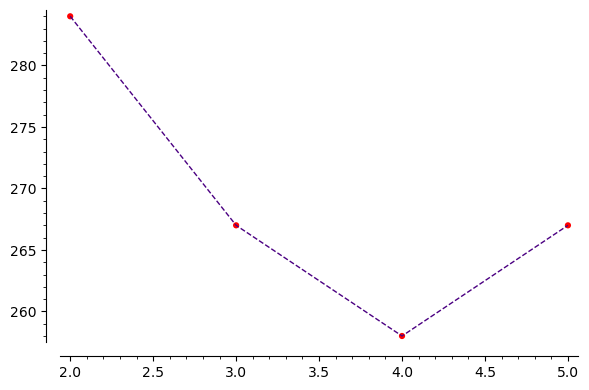

In [192]:
def test_k_influence(n):
    k_values = range(2, 10)
    chain_len_values = tuple((k, brauer_alg(n, k)[0]) for k in k_values)
    print(f"Влияние параметра k на длину аддитивной цепочки для n = {n}")
    plt = list_plot(chain_len_values, plotjoined=True, linestyle='--', color='indigo') + \
            list_plot(chain_len_values, color='red',size=20)
    plt.show()

    k_values = range(2, 6)
    print(f'Те же значения, но рассматриваем от {k_values[0]} до {k_values[-1]}')
    chain_len_values = tuple((k, brauer_alg(n, k)[0]) for k in k_values)

    plt = list_plot(chain_len_values, plotjoined=True, linestyle='--', color='indigo') + \
            list_plot(chain_len_values, color='red',size=20)
    plt.show()

n_values = (37894389,
            47839948409834683717134578679, 
            3840239819027432814678129435532539734242319083214579879680809,
           )
for n_i in n_values:
    test_k_influence(n_i)

Как можно заметить, существует некоторое оптимальное значение k, после которого длина заданной цепочки растёт практически экспоненциально. Это связано с тем, что алгоритм Брауэра требует исползование базовой последовательности $1,2,3,...,2^k-1$. Несмотря на используемую оптимизацию этой последовательности $1,2,3,...max\{q_s, r_i\}$ (более подробно в пунтке 5), она сильно увеличивается с ростом k. И в целом, при приближении $2^k$ к $n$ последовательность вырождается в последовательность натуральных чисел.

Какое именно значение k оптимальное? Для сравнительно небольших n подходящие значения $k = 2$ или $k=3$. По теореме Брауэра, при значении $k = \lambda\lambda(n) - 2\lambda\lambda\lambda(n)$ для больших n длина цепочки будет минимизироваться.

Теперь исследуем ответ алгоритма и фактическую длину минимальной цепочки для n.

In [88]:
n_values = [119, 1085, 2091, 12347, 16032, 109784, 397843]
exact_lens = [9, 13, 14, 17, 17, 21, 23]
alg_lens = [min(brauer_alg(n_value, 1)[0], brauer_alg(n_value, 2)[0], brauer_alg(n_value, 3)[0])
            for n_value in n_values]

for n_i, exact_i, alg_i in zip(n_values, exact_lens, alg_lens):
    print(f"Для {n_i} минимальное = {exact_i}, полученное = {alg_i}")


Для 119 минимальное = 9, полученное = 10
Для 1085 минимальное = 13, полученное = 14
Для 2091 минимальное = 14, полученное = 15
Для 12347 минимальное = 17, полученное = 17
Для 16032 минимальное = 17, полученное = 18
Для 109784 минимальное = 21, полученное = 23
Для 397843 минимальное = 23, полученное = 24


Как можно заметить, алгоритм Брауэра в основном даёт не минимальную длину цепочки, однако достаточно близок к ней. Основной плюс алгоритма Брауэра - быстродействие, разложение даже достаточно больших чисел занимает небольшое количество времени, так как, по сути, алгоритм имеет $m=log_{2^k}(n)$ шагов (для каждой из цифр строится последовательность и итоговые последовательности склеиваются), в каждом из которых строится список из k+2 элементов. 

В итоге, алгоритм Брауэра работает быстро и даёт приближённый (по минимальности длины цепочки) ответ. Ответ сильно зависит от правильного выбора параметра k.

### 3) Реализовать алгоритм дробления вектора индексов для нахождения минимальной звёздной цепочки для заданного числа. Протестировать алгоритм минимум для 5 значений 𝑛 > 1000. Указать, сколько времени потребовалось на поиск цепочки и какая цепочка получилась. Сравнить с предыдущими методами, сделать выводы.

In [132]:
def decrease_indexes_vector(indexes_vector, m_max):
    # returns has vector changed or not
    if indexes_vector[-1] > 1:
        indexes_vector[-1] -= 1
    else:
        i = -1
        while i != -m_max - 1 and indexes_vector[i] == 1:
            i -= 1
        if i == -m_max - 1:
            return False
        indexes_vector[i] -= 1
        indexes_vector[i+1:] = [max_val+1 for max_val in range(m_max + i + 1, m_max)]
    return True

def get_chain_from_indexes_vector(indexes_vector):
    chain = [1]
    for index in indexes_vector:
        index = index-1
        chain.append(chain[-1] + chain[index])
    return chain

def vector_fragmentation_alg(n):
    n_2_base = base10_to_other(n, 2)
    
    m_lower_bound = ceil(log(n, 2))
    m_upper_bound = _lambda(n) + _vu(n) - 1
        
    if m_lower_bound == m_upper_bound == 0:
        return [1]
    if m_lower_bound == m_upper_bound == 1:
        return [1, 2]

    for m in range(m_lower_bound, m_upper_bound+1):
        q = m//2
        fixed_part = list(max_val for max_val in range(1, q+1))

        a = get_chain_from_indexes_vector(fixed_part)[-1]
        a_min = a + m - q
        a_max = a*2**(m-q)
        
        # делаем так, чтобы на первой итерации получить цепочку от исходного вектора,
        # т.к. decrease_indexes_vector уменьшает вектор.
        fixed_part[-1] += 1
        while decrease_indexes_vector(fixed_part, len(fixed_part)):
            if a_min <= n <= a_max:
                if a_min == n:
                    return get_chain_from_indexes_vector(fixed_part + [1 for _ in range (q+1, m+1)])
                if a_max == n:
                    return get_chain_from_indexes_vector(fixed_part + [elem for elem in range (q+1, m+1)])

                
                changing_part = list(max_val for max_val in range(q+1, m+1))
                # делаем так, чтобы на первой итерации получить цепочку от исходного вектора,
                # т.к. decrease_indexes_vector уменьшает вектор.
                changing_part[-1] += 1
                count = 0
                while decrease_indexes_vector(changing_part, len(fixed_part)):
                    chain = get_chain_from_indexes_vector(fixed_part + changing_part)
                    if chain[-1] == n:
                        return chain
            # если n не попало в диапозон значений последнего элемента цепочки данных векторов        
            else:
                continue
    # если цепочка не нашлась - ошибка в алгоритме
    raise ValueError(f"{n} - не нашёлся ответ")
    

In [61]:
import time 

n_values = [1111, 1075, 2089, 1703, 1888]
for n in n_values:
    start = time.time()
    chain=vector_fragmentation_alg(n)
    print(f"time: {time.time() - start}, chain: {chain}")

time: 113.97660398483276, chain: [1, 2, 4, 8, 16, 32, 64, 65, 130, 260, 520, 1040, 1105, 1109, 1111]
time: 51.7018609046936, chain: [1, 2, 4, 8, 16, 17, 33, 66, 132, 264, 528, 1056, 1073, 1075]
time: 108.44448924064636, chain: [1, 2, 4, 8, 16, 32, 64, 128, 256, 512, 1024, 2048, 2080, 2088, 2089]
time: 346.8754346370697, chain: [1, 2, 4, 8, 12, 13, 26, 52, 104, 208, 416, 832, 1664, 1690, 1703]
time: 116.73165917396545, chain: [1, 2, 4, 8, 16, 32, 48, 56, 112, 224, 448, 896, 1792, 1840, 1888]


Было проверено, что для $n=1111$ и $n=2089$ минимальные цепочки имеют длину $=14$, такую же, как и в ответе алгоритма. Таким образом, алгоритм дробления вектора индексов даёт более точный ответ, чем алгоритм Брауэра.

При этом алгоритм дробления работает заметно медленнее алгоритма Брауэра, так как является, по сути, оптимизированным перебором. В худшем случае нужно сделать перебор $m_{up}$ значений длин цепочек, где $m_{up}$ - некоторая верхняя граница. Однако, за счёт оптимизации выбора диапазона значений $m$ алгоритм работает быстрее и перебирает только $m_{up}-m_{low}+1$ значений длин, где $m_{up}$ и $m_{low}$ - некоторые верхняя и нижняя границы. Однако сложность каждого шага составляет $O(\frac{m!}{q!})$ - перебор меняющейся части, так что сложность алгоритма растёт экспоненциально.

### 4) Проверить гипотезу Шольца–Брауэра для всех натуральных $1 \leq 𝑛 \leq 12$ на алгоритме дробления вектора индексов. Результаты оформить в виде таблицы. Сделать выводы.

Гипотеза Шольца-Брауэра заключается в том, что $l(2^n-1) \leq l(n) + n - 1$. Гипотеза доказана для звёздных цепочек и для $1 \leq n \leq 64$ выполняется равенство. Для $n < 12509$ есть равенство мин.  длин цепочек $l(n)=l^*(n)$.

Проверим данную гипотезу для $1 \leq n \leq 12$:

In [60]:
n_values = (i for i in range(1, 13))
print(f"Проверка равенства l(2^n - 1) == l(n) + n - 1")
for n in n_values:
    print(f"n = {n}: {len(vector_fragmentation_alg(2**n - 1)) - 1}" 
          f"== {len(vector_fragmentation_alg(n)) - 1} + {n} - 1")

Проверка равенства l(2^n - 1) == l(n) + n - 1
n = 1: 0 == 0 + 1 - 1
n = 2: 2 == 1 + 2 - 1
n = 3: 4 == 2 + 3 - 1
n = 4: 5 == 2 + 4 - 1
n = 5: 7 == 3 + 5 - 1
n = 6: 8 == 3 + 6 - 1
n = 7: 10 == 4 + 7 - 1
n = 8: 10 == 3 + 8 - 1
n = 9: 12 == 4 + 9 - 1
n = 10: 13 == 4 + 10 - 1
n = 11: 15 == 5 + 11 - 1
n = 12: 15 == 4 + 12 - 1


Оформим полученный результат в виде таблицы:

| n  | l(2^n-1) | == | l(n)+n-1 |
|----|----------|----|----------|
| 1  | 0        | == | 0+1-1    |
| 2  | 2        | == | 1+2-1    |
| 3  | 4        | == | 2+3-1    |
| 4  | 5        | == | 2+4-1    |
| 5  | 7        | == | 3+5-1    |
| 6  | 8        | == | 3+6-1    |
| 7  | 10       | == | 4+7-1    |
| 8  | 10       | == | 3+8-1    |
| 9  | 12       | == | 4+9-1    |
| 10 | 13       | == | 4+10-1   |
| 11 | 15       | == | 5+11-1   |
| 12 | 15       | == | 4+12-1   |

Таким образом, была проверена гипотеза Шольца-Брауэра для $1 \leq n \leq 12$ и, действительно, для данных $n$ выполняется равенство $l(2^n-1)=l(n)+n-1$. Для вычисления чисел вида $2^n-1$ можно однозначно определить длину минимальной цепочки, она $=l(n)+n-1$. Данное равенство выполняется для $1 \leq n \leq 64$. Для остальных $n$ $l(n)+n-1$ является верхней оценкой.

### 5) Найти или предложить собственные модификации алгоритмов и привести описание модификаций. Реализовать модифицированные алгоритмы и сравнить их мощность.

При реализации алгоритма Брауэра были использованы следующие оптимизации:
> 1) Начальная последовательность не $1, 2, 3, ..., 2^k -1$, а $1, 2, ..., b$, где $b$ - максимальная цифра числа в системе счисления $2^k$  
2) Не дублируются числа, которые получаются прибавление $r_i=0$.

Данные оптимизации позволяют сократить длину брауэровской цепочки. Однако, данные оптимизации достаточно просты и подробно их рассматривать не будем.

Интереснее будет рассмотреть модифицации алгоритма дробления векторов и их влияние на трудоёмкость алгоритма.
> 1) Использование специальных свойств переданных чисел для выбора оптимального диапазона длин цепочек $m_{min}$ и $m_{max}$. 
>> 1.1) $\forall n: \nu(n)=2$ выполняется $l(2^A+2^B)=A+1$, если $A>B$  
>> 1.2) $\forall n: \nu(n)=3$ выполняется $l(2^A+2^B+2^C)=A+2$, если $A>B>C$  
>> 1.3) $\forall n: \nu(n)\geq4$ ?  
>> 1.4) $\forall n: \nu(n)>8$ выполняется $l(n)\geq \lambda(n)+ 4$  

> 2) По следствию из теоремы Брауэра $l(n) \leq \lambda(n)(1+\frac{1}{\lambda\lambda(n)}+O(\frac{\lambda\lambda\lambda(n)}{(\lambda\lambda(n))^2})$. Будем использовать $l(n) \leq \lambda(n)(3+\frac{1}{\lambda\lambda(n)})$  

Проверим, насколько хороша оценка из пункта 2. Допустим, рассматриваемые $4 < n < 10000$. Для $n=1,2,3$ в делителе 0. Тогда найдём максимальный из остатков:

In [124]:
remainder = max(_lambda(_lambda(_lambda(n)))/((_lambda(_lambda(n)))^2) * _lambda(n) 
                for n in IntegerRange(4,10001))
remainder

7/4

Соответственно, остаток $O(\frac{\lambda\lambda\lambda(n)}{(\lambda\lambda(n))^2}) \leq 7/4 \leq 2$, тем самым доказав оценку 2).

Теперь реализуем сам модифицированный алгоритм:

In [133]:
def get_m_bounds(n):
    m_lower_bound = ceil(log(n, 2))
    m_upper_bound = min(_lambda(n) + _vu(n) - 1, 
                        _lambda(n)*(3 + 1/(_lambda(_lambda(n))))
                       )
    hamming_weigth = _vu(n)
    if hamming_weigth == 1:
        # 2^_lambda(n) == n
        m_lower_bound = m_upper_bound = _lambda(n)
    elif hamming_weigth == 2:
        m_lower_bound = m_upper_bound = _lambda(n) + 1
    elif hamming_weigth == 3:
        m_lower_bound = m_upper_bound = _lambda(n) + 2
    elif hamming_weigth > 8:
        m_lower_bound = _lambda(n) + 4
    return m_lower_bound, m_upper_bound
        
def vector_fragmentation_alg_optimized(n):
    n_2_base = base10_to_other(n, 2)
    
    m_lower_bound, m_upper_bound = get_m_bounds(n)
        
    if m_lower_bound == m_upper_bound == 0:
        return [1]
    if m_lower_bound == m_upper_bound == 1:
        return [1, 2]

    for m in range(m_lower_bound, m_upper_bound+1):
        q = m//2
        fixed_part = list(max_val for max_val in range(1, q+1))

        a = get_chain_from_indexes_vector(fixed_part)[-1]
        a_min = a + m - q
        a_max = a*2**(m-q)
        
        # do so on 1st iter we get tuple as it was
        fixed_part[-1] += 1
        while decrease_indexes_vector(fixed_part, len(fixed_part)):
            if a_min <= n <= a_max:
                if a_min == n:
                    return get_chain_from_indexes_vector(fixed_part + [1 for _ in range (q+1, m+1)])
                if a_max == n:
                    return get_chain_from_indexes_vector(fixed_part + [elem for elem in range (q+1, m+1)])

                # do so on 1st iter we get tuple as it was
                changing_part = list(max_val for max_val in range(q+1, m+1))
                changing_part[-1] += 1
                count = 0
                
                while decrease_indexes_vector(changing_part, len(fixed_part)):
                    chain = get_chain_from_indexes_vector(fixed_part + changing_part)
                    if chain[-1] == n:
                        return chain
            # если n не попало в диапозон значений последнего элемента цепочки данных векторов        
            else:
                continue
    # если цепочка не нашлась - ошибка в алгоритме
    raise ValueError(f"{n} - не нашёлся ответ")
    

Рассмотрим, как проведенные модификации сказались на диапазоне длины цепочек:

In [179]:
n_values = [2048, 2048+32, 1024+32+16, 2048-1, 1728, 1983, 1111, 512-1,1024-1]

for n in n_values:
    m_lower_bound = ceil(log(n, 2))
    m_upper_bound = _lambda(n) + _vu(n) - 1

    m_lower_bound_opt, m_upper_bound_opt = get_m_bounds(n)
    print(f"n={n}: старый диапазон [{m_lower_bound},{m_upper_bound}]"
          f" оптимизированный диапазон [{m_lower_bound_opt}, {m_upper_bound_opt}]")

n=2048: старый диапазон [11,11] оптимизированный диапазон [11, 11]
n=2080: старый диапазон [12,12] оптимизированный диапазон [12, 12]
n=1072: старый диапазон [11,12] оптимизированный диапазон [12, 12]
n=2047: старый диапазон [11,20] оптимизированный диапазон [14, 20]
n=1728: старый диапазон [11,13] оптимизированный диапазон [11, 13]
n=1983: старый диапазон [11,19] оптимизированный диапазон [14, 19]
n=1111: старый диапазон [11,15] оптимизированный диапазон [11, 15]
n=511: старый диапазон [9,16] оптимизированный диапазон [12, 16]
n=1023: старый диапазон [10,18] оптимизированный диапазон [13, 18]


Как можно заметить, проведённые оптимизации позволили уменьшить рассматриваемый диапазон значений. Теперь сравним, насколько быстрее работает алгоритм для значений $n=\{1072,511, 1023\}$

In [180]:
n_values = [1072, 511, 1023]

for n in n_values:
    start = time.time()
    chain_len = len(vector_fragmentation_alg(n)) - 1
    print(f"n={n} Не опт: время {time.time()-start}, длина {chain_len}")


    start = time.time()
    chain_len = len(vector_fragmentation_alg_optimized(n)) - 1
    print(f"n={n} Опт: время {time.time()-start}, длина {chain_len}")

n=1072 Не опт: время 2.11030912399292, длина 12
n=1072 Опт: время 0.0012135505676269531, длина 12
n=511 Не опт: время 10.36326813697815, длина 12
n=511 Опт: время 6.6806230545043945, длина 12
n=1023 Не опт: время 122.99211955070496, длина 13
n=1023 Опт: время 47.003913164138794, длина 13


Таким образом, модифицированный алгоритм на некоторых значениях $n$ работает быстрее, чем алгоритм без модификаций.

## Выводы

В ходе практической работы были сравнены алгоритмы быстрого возведения в степень - метод множителей и бинарный метод.

Также, были реализованы алгоритм Брауэра для нахождения аддитивной цепочки и алгоритм дробления вектора индексов для поиска минимальной звездной цепочки. Был проведен анализ данных алгоритмов, после чего было выяснено, что алгоритм Брауэра позволяет быстро найти аддитивную цепочку для числа $n$, однако она не обязательно будет минимальной, также, на результат работы алгоритма влияет выбор параметра $k$. Алгоритм дробления вектора индексов работает дольше, так как по сути является оптимизированным перебором, зато дает минимальную звездную цепочку, которая по длине совпадает с минимальной аддитивной для $n < 12509$. 